# Multi model comparison

We often want to compare the result of multiple models. 

**Calibration**. We have several "runs" of the same model with different settings. We would like to find the best. 

**Validation**. We would like to compare our model with alternative models, e.g. a regional DHI model or an external model. 

In this notebook, we will consider several wave models for the Southern North Sea and compare to both point measurements and satellite altimetry data. 


In [1]:
import numpy as np
from modelskill import ModelResult
from modelskill import PointObservation, TrackObservation, Connector

## Define observations

In [2]:
o1 = PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("data/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [3]:
mr1 = ModelResult('data/SW/HKZN_local_2017_DutchCoast.dfsu', name='SW_1', item=0)
mr2 = ModelResult('data/SW/HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2', item=0)
mr3 = ModelResult('data/SW/ERA5_DutchCoast.nc', name='ERA5', item="swh")

## Connect observations and model results

In [4]:
con = Connector([o1, o2, o3], [mr1, mr2, mr3])
con

<Connector> with 
 -<PointConnector> obs=HKNA(n=564) :: 3 models=[SW_1, SW_2...]
 -<PointConnector> obs=EPL(n=94) :: 3 models=[SW_1, SW_2...]
 -<TrackConnector> obs=c2(n=299) :: 3 models=[SW_1, SW_2...]

In [5]:
con.modelresults

{'SW_1': <DfsuModelResult> 'SW_1',
 'SW_2': <DfsuModelResult> 'SW_2',
 'ERA5': <modelskill.model.grid.GridModelResult at 0x7f075b32fcd0>}

In [7]:
# con.plot_observation_positions();

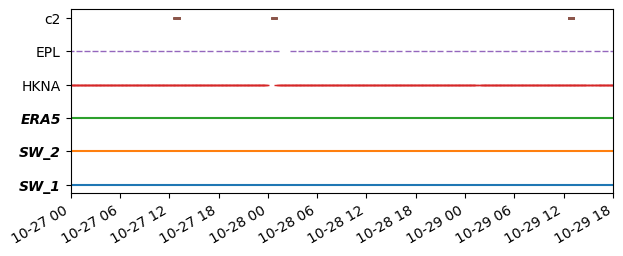

In [8]:
con.plot_temporal_coverage();

In [9]:
cc = con.extract()    # returns a collection of comparisons

In [10]:
cc["EPL"]   # select a single comparer from the collection like this

<PointComparer>
Quantity: Significant wave height [meter]
Observation: EPL, n_points=66
 Model: SW_1, rmse=0.225
 Model: SW_2, rmse=0.234
 Model: ERA5, rmse=0.290
 Auxiliary: z

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()
* taylor()

In [11]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model observation                                                          
ERA5  EPL           66 -0.207731  0.289960  0.202299  0.223748  0.972255   
      HKNA         386 -0.437425  0.545329  0.325643  0.441374  0.974863   
      c2            99 -0.385808  0.463093  0.256140  0.393481  0.977581   
SW_1  EPL           66 -0.066028  0.224919  0.215009  0.189791  0.969512   
      HKNA         386 -0.194260  0.351964  0.293499  0.251839  0.971194   
      c2            99 -0.031866  0.356946  0.355521  0.300259  0.972395   
SW_2  EPL           66  0.001181  0.233964  0.233961  0.199915  0.969512   
      HKNA         386 -0.100426  0.293033  0.275287  0.214422  0.971194   
      c2            99  0.045900  0.427302  0.424829  0.357356  0.972395   

                         si        r2  
model observation                      
ERA5  EPL          0.077880  0.887121  
      HKNA         0.104837  0.772663  
      c2           0.094369  0.809338  
SW_1  EPL          0.082773  0.932082  
      HKNA         0.094489  0.905300  
      c2           0.130984  0.886725  
SW_2  EPL          0.090069  0.926509  
      HKNA         0.088626  0.934358  
      c2           0.156519  0.837671

In [12]:
cc.skill(observation="c2")

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_collection.py:39: FutureWarning: The 'observation' argument is deprecated, use 'sel(observation='c2') instead
  warnings.warn(


,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
ERA5,c2,99,-0.385808,0.463093,0.256140,0.393481,0.977581,0.094369,0.809338
SW_1,c2,99,-0.031866,0.356946,0.355521,0.300259,0.972395,0.130984,0.886725
SW_2,c2,99,0.045900,0.427302,0.424829,0.357356,0.972395,0.156519,0.837671


In [13]:
cc.mean_skill(model=0, observation=[0,"c2"])

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_comparison.py:47: FutureWarning: The 'model' argument is deprecated, use 'sel(model='0')' instead
  warnings.warn(
/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_collection.py:39: FutureWarning: The 'observation' argument is deprecated, use 'sel(observation='[0, 'c2']') instead
  warnings.warn(
/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_collection.py:720: FutureWarning: The provided callable <function sum at 0x7f07b57bc160> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  res = skilldf.groupby(by).agg(agg)


,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
ERA5,485,-0.411616,0.504211,0.290892,0.417427,0.976222,0.099603,0.791001
SW_1,485,-0.113063,0.354455,0.324510,0.276049,0.971795,0.112736,0.896013
SW_2,485,-0.027263,0.360167,0.350058,0.285889,0.971795,0.122572,0.886014


/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_collection.py:582: FutureWarning: scatter is deprecated, use plot.scatter instead
  warnings.warn("scatter is deprecated, use plot.scatter instead", FutureWarning)
/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/comparison/_comparison.py:47: FutureWarning: The 'model' argument is deprecated, use 'sel(model='SW_1')' instead
  warnings.warn(


<Axes: title={'center': 'SW_1 vs Observations'}, xlabel='Observation, Significant wave height [meter]', ylabel='Model, Significant wave height [meter]'>

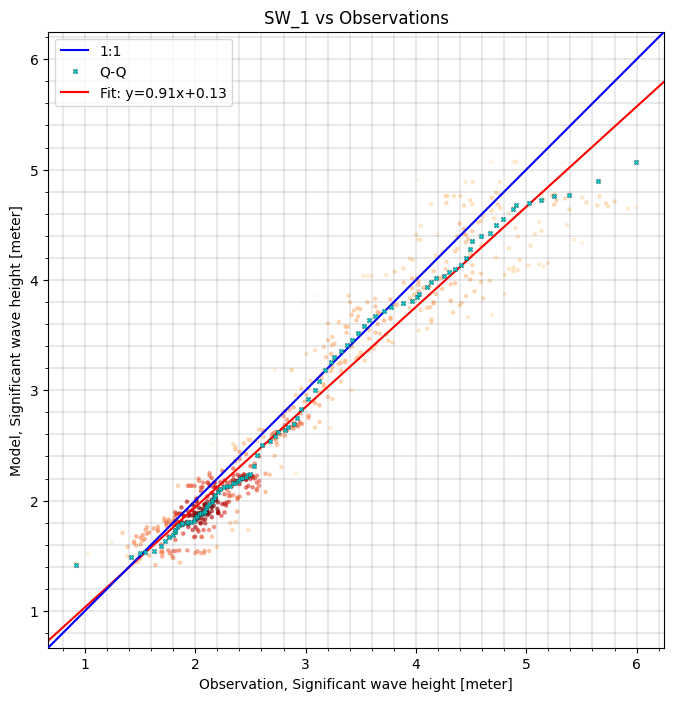

In [14]:
cc.scatter(model='SW_1', cmap='OrRd')

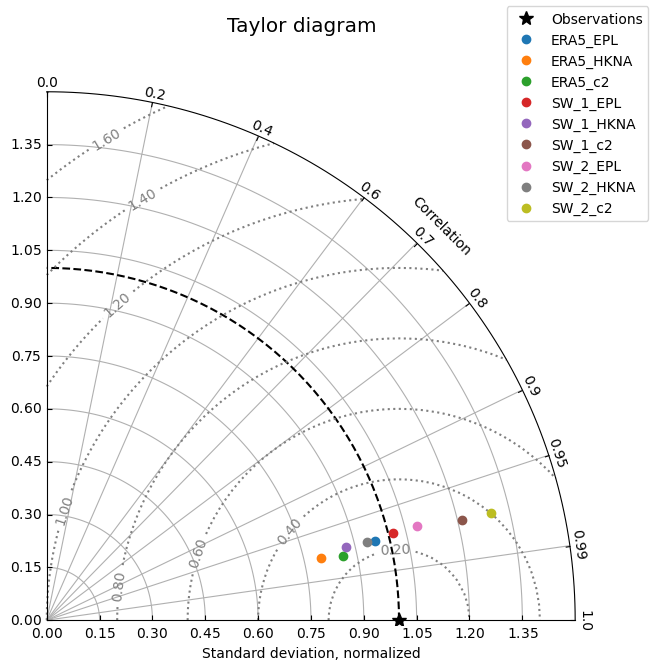

In [16]:
cc.plot.taylor(normalize_std=True, aggregate_observations=False)

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

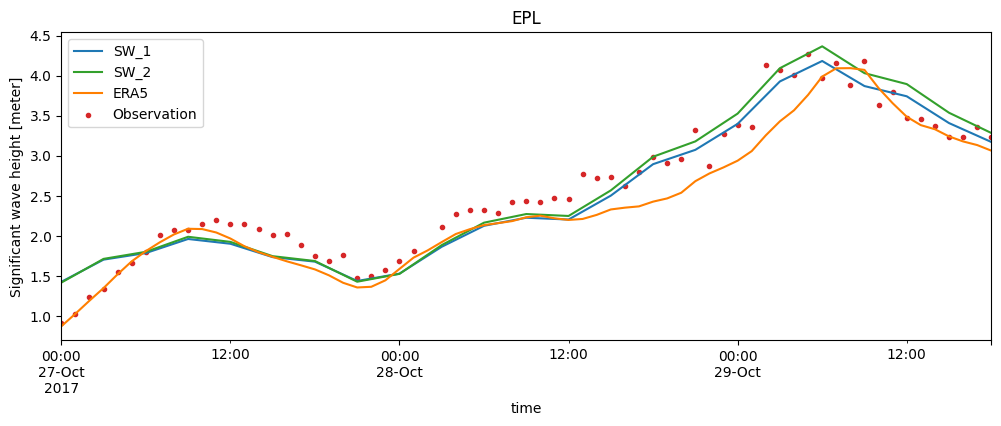

In [17]:
cc['EPL'].plot.timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [18]:
cc.sel(model="SW_1", end='2017-10-28').skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,47,-0.100029,0.240775,0.219013,0.205827,0.919089,0.101695,0.811727
HKNA,281,-0.097075,0.203241,0.178559,0.164563,0.968106,0.070167,0.916126
c2,66,-0.210375,0.323525,0.245786,0.268925,0.385374,0.121671,-1.855535


<Axes: title={'center': 'SW_2 vs Observations'}, xlabel='Observation, Significant wave height [meter]', ylabel='Model, Significant wave height [meter]'>

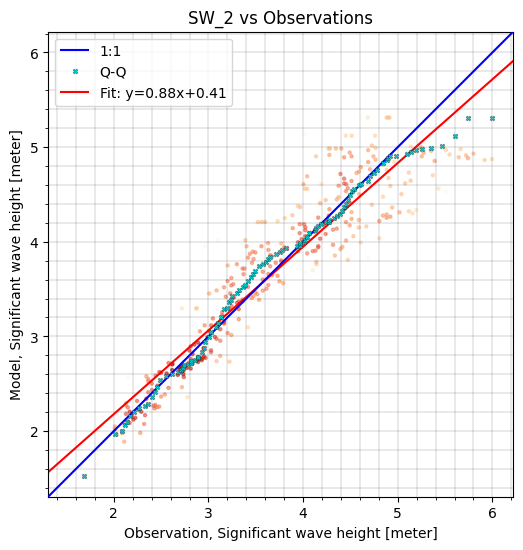

In [20]:
cc.sel(model='SW_2', start='2017-10-28').plot.scatter(cmap='OrRd', figsize=(6,7))

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [21]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

In [23]:
#ax = con.plot_observation_positions();
#ax.plot([bbox[0],bbox[2],bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3],bbox[1]]);
#ax.plot(polygon[:,0],polygon[:,1]);

In [ ]:
cc.skill(model="SW_1", area=bbox)

In [ ]:
cc.scatter(model="SW_2", area=polygon) # , backend='plotly'

## Skill object

The skill() and mean_skill() methods return a skill object that can visualize results in various ways. The primary methods of the skill object are:

* style()
* plot_bar()
* plot_barh()
* plot_line()
* plot_grid()
* sel()

In [24]:
s = cc.skill()

In [25]:
s.style()

In [26]:
s.style(columns='rmse')

/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/skill.py:516: FutureWarning: plot_bar() is deprecated, use plot.bar() instead
  warnings.warn("plot_bar() is deprecated, use plot.bar() instead", FutureWarning)
/home/jan/src/book-learn-mikeio-fmskill/.venv/lib/python3.10/site-packages/modelskill/skill.py:520: FutureWarning: plot_barh() is deprecated, use plot.barh() instead
  warnings.warn(


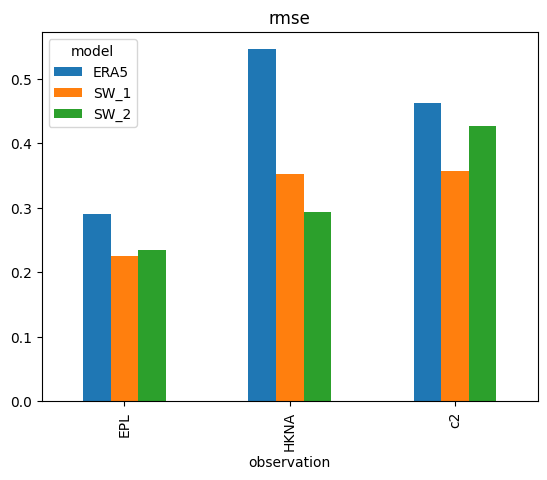

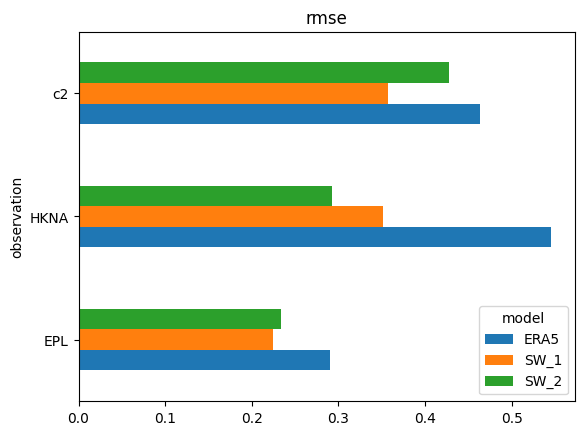

In [27]:
s.plot_bar('rmse');
s.plot_barh('rmse');  # horizontal version

In [28]:
s = cc.skill(by=['model','freq:12H'], metrics=['bias','rmse','si'])

In [29]:
s.style()

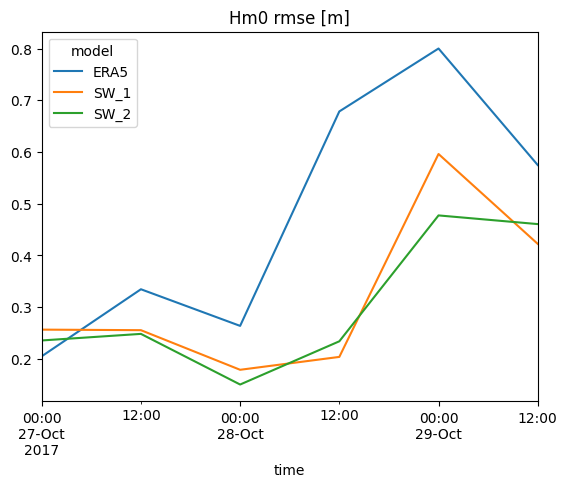

In [33]:
s.plot.line('rmse', title='Hm0 rmse [m]');

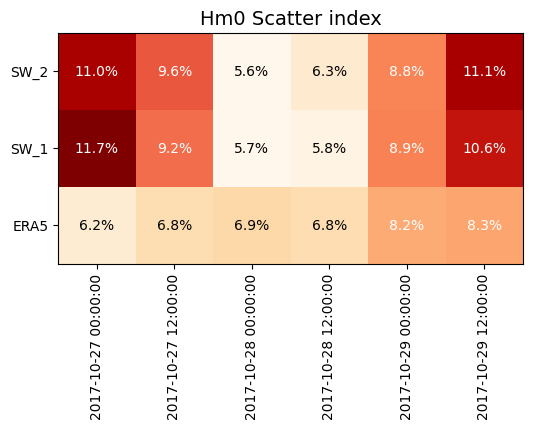

In [32]:
s.plot.grid('si', fmt='0.1%', title='Hm0 Scatter index');

### The sel() method can subset the skill object 

A new skill object will be returned

In [34]:
s = cc.skill()
s.style()

In [35]:
s.sel(model='SW_1').style()

,model,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,,
EPL,SW_1,66,-0.066,0.225,0.215,0.190,0.970,0.083,0.932
HKNA,SW_1,386,-0.194,0.352,0.293,0.252,0.971,0.094,0.905
c2,SW_1,99,-0.032,0.357,0.356,0.300,0.972,0.131,0.887


In [36]:
s.sel(observation='HKNA').style()

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
ERA5,HKNA,386,-0.437,0.545,0.326,0.441,0.975,0.105,0.773
SW_1,HKNA,386,-0.194,0.352,0.293,0.252,0.971,0.094,0.905
SW_2,HKNA,386,-0.100,0.293,0.275,0.214,0.971,0.089,0.934


In [37]:
s.sel('rmse>0.25').style()

In [38]:
s.sel('rmse>0.3', columns=['rmse','mae']).style()